In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

# Load data

In [4]:
engine1 = pd.read_csv("UIPA.HMD8310H.Engine1.csv")
engine2 = pd.read_csv("UIPA.HMD8310H.Engine2.csv")

/tmp/ipykernel_1568024/1235946815.py:1: DtypeWarning: Columns (152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,3

<Axes: >

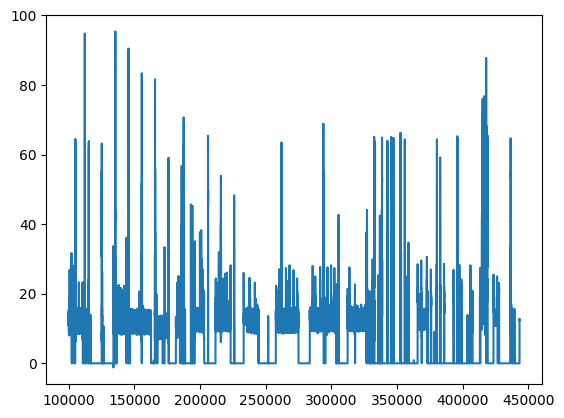

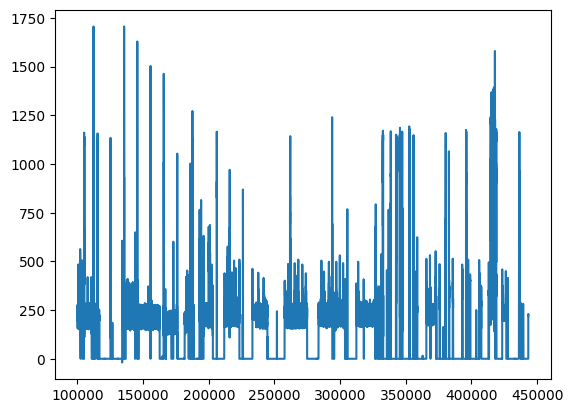

In [5]:
engine1.loc[100000:, "aIEngineLoadPercent"].plot()
plt.figure()
engine1.loc[100000:, "aIEngineLoad"].plot()

<Axes: >

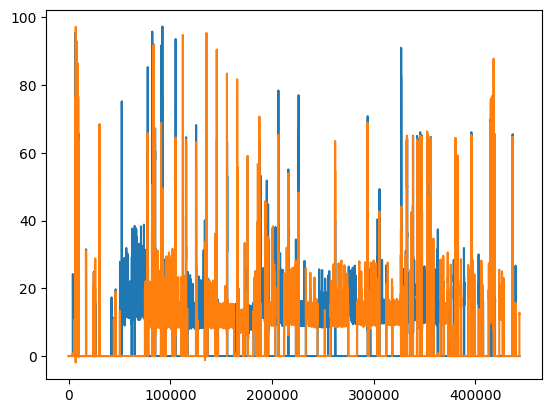

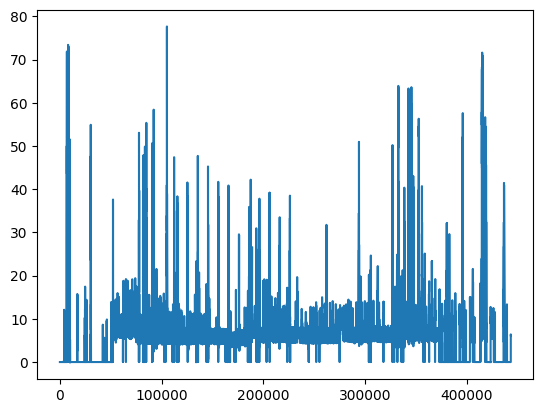

In [6]:
engine2.aIEngineLoadPercent.plot()
engine1.aIEngineLoadPercent.plot()
plt.figure()
((engine1.aIEngineLoadPercent+engine2.aIEngineLoadPercent)/2).plot()

In [7]:
engine1["battery_only"] = engine1["dIECSPoweredByBatteryOnlyPilotTrip"].fillna(0).astype(int)
engine2["battery_only"] = engine2["dIECSPoweredByBatteryOnlyPilotTrip"].fillna(0).astype(int)

In [8]:
merged_df = pd.merge(engine1[["aIEngineLoad", "time", "battery_only"]], engine2[["aIEngineLoad", "time"]], on='time', how='inner')
merged_df["total_load"] = merged_df["aIEngineLoad_x"] + merged_df["aIEngineLoad_y"]
merged_df_all_columns = pd.merge(engine1, engine2, on='time', how='inner')
merged_df_all_columns["total_load"] = merged_df_all_columns["aIEngineLoad_x"] + merged_df_all_columns["aIEngineLoad_y"]

: 

In [ ]:
mgo = pd.read_csv("RemoteLevelThing_HMD8310.csv")
mgo["total_vol"] = mgo["MGO_STOR_TK_C_CALC_VOL"] + mgo["MGO_STOR_TK_S_CALC_VOL"] + mgo["NO1_MGO_SERV_TK_CALC_VOL"] + mgo["NO2_MGO_SERV_TK_CALC_VOL"]

/tmp/ipykernel_3836249/3850218066.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  mgo = pd.read_csv("RemoteLevelThing_HMD8310.csv")


In [ ]:
engine_and_fuel_df = pd.merge(merged_df, mgo[["total_vol", "time"]], on='time', how='inner')
engine_and_fuel_df_all_columns = pd.merge(merged_df_all_columns, mgo[["total_vol", "time"]], on='time', how='inner')

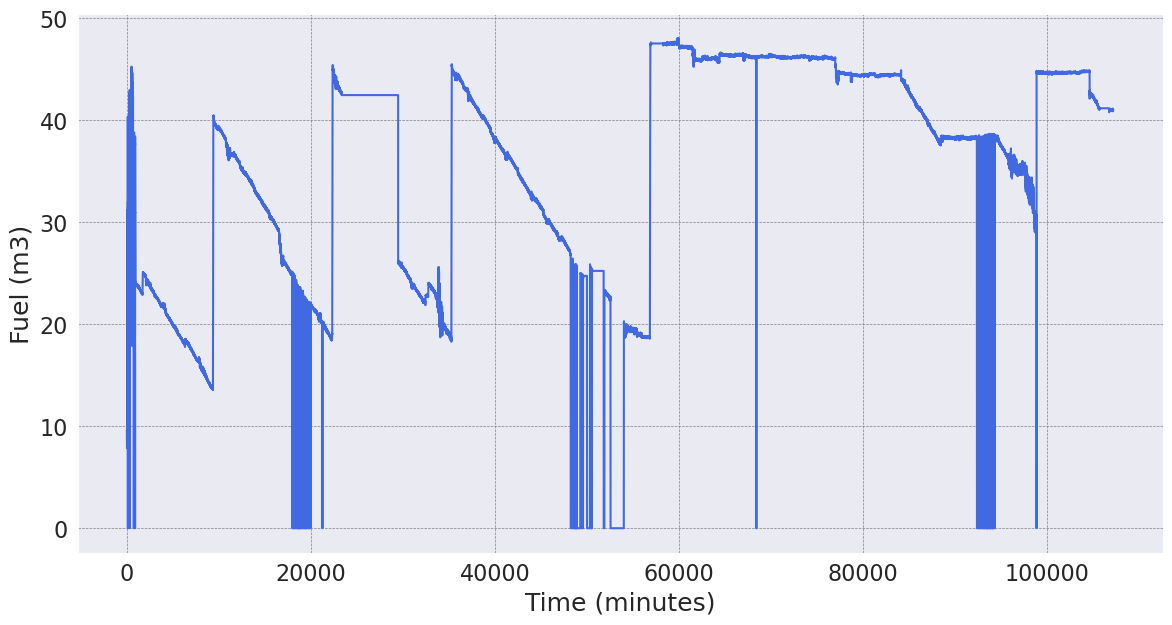

In [7]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))
sns.lineplot(engine_and_fuel_df_all_columns["total_vol"], color="royalblue")

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=18)
plt.ylabel('Fuel (m3)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

In [8]:
for column in engine_and_fuel_df_all_columns.columns:
    print(column)

Unnamed: 0_x
time
aIAirTemperatureTCInlet_x
aIBaseDurationGasAdmission_x
aIChargeAirPressureEngineInlet_x
aIChargeAirSetpointBarMPa_x
aIChargeAirTemperatureEngineInlet_x
aICounterStarts_x
aICounterStartsX10000_x
aICrankcasePressure_x
aICyclicSlowTurningResult_x
aICyclicSlowTurningState_x
aIDVTControlAirPressure_x
aIDurationOffsetGasAdmissionCylinderA01_x
aIDurationOffsetGasAdmissionCylinderA02_x
aIDurationOffsetGasAdmissionCylinderA03_x
aIDurationOffsetGasAdmissionCylinderA04_x
aIDurationOffsetGasAdmissionCylinderA05_x
aIDurationOffsetGasAdmissionCylinderA06_x
aIDurationOffsetGasAdmissionCylinderA07_x
aIDurationOffsetGasAdmissionCylinderA08_x
aIDurationOffsetGasAdmissionCylinderA09_x
aIDurationOffsetPilotInjectionCylinderA01_x
aIDurationOffsetPilotInjectionCylinderA02_x
aIDurationOffsetPilotInjectionCylinderA03_x
aIDurationOffsetPilotInjectionCylinderA04_x
aIDurationOffsetPilotInjectionCylinderA05_x
aIDurationOffsetPilotInjectionCylinderA06_x
aIDurationOffsetPilotInjectionCylinderA07_x

<AxesSubplot: >

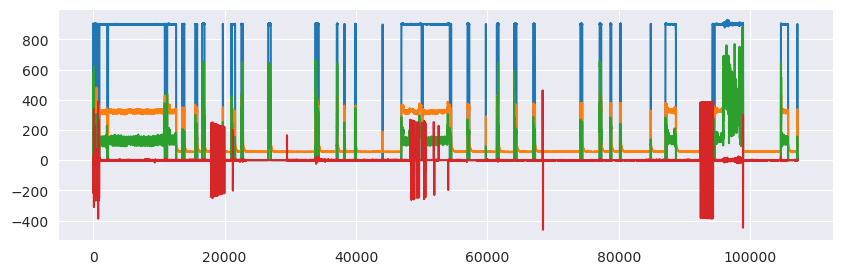

In [9]:
plt.figure(figsize=(10, 3))
engine_and_fuel_df_all_columns.aIEngineSpeed1_x.plot()
engine_and_fuel_df_all_columns.aIExhaustGasTemperatureAverage_x.plot()
(engine_and_fuel_df_all_columns.aIEngineLoadPercent_x*10).plot()
(engine_and_fuel_df_all_columns.total_vol.diff(-1)*10).plot()

# Find useful segments

In [10]:
numeric_columns = engine_and_fuel_df_all_columns.select_dtypes(include=['number'])
numeric_columns["total_vol_diff"] = numeric_columns["total_vol"].diff()
numeric_columns["total_vol_diff"].iloc[:-1] = numeric_columns["total_vol_diff"].iloc[1:].values
corr = numeric_columns.corr()

/tmp/ipykernel_3836249/2805894286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_columns["total_vol_diff"].iloc[:-1] = numeric_columns["total_vol_diff"].iloc[1:].values


In [11]:
print(corr["total_vol_diff"].sort_values(ascending=False)[:5])
print(corr["total_vol_diff"].sort_values(ascending=True)[:5])

total_vol_diff                                  1.000000
aICyclicSlowTurningState_y                      0.008492
aICyclicSlowTurningState_x                      0.004630
aITimeRemainingForNextCyclicSlowTurningSec_x    0.003461
aIModbusHeartbeatCounter_y                      0.003421
Name: total_vol_diff, dtype: float64
total_vol                                      -0.051304
aITimeRemainingForNextCyclicSlowTurningMin_y   -0.017514
aIKnockKnockIntensityCylinderA07_y             -0.014379
aIDurationOffsetPilotInjectionCylinderA05_y    -0.004995
aIKnockKnockIntensityCylinderA07_x             -0.004850
Name: total_vol_diff, dtype: float64


In [12]:
fuel_noise_start_points = [1750, 10000, 29500, 35400, 85500]
fuel_noise_end_points = [9300, 17800, 32200, 48100, 88500]

segments = []

for noise_start_point, noise_end_point in zip(fuel_noise_start_points, fuel_noise_end_points):
    segment = engine_and_fuel_df_all_columns.loc[noise_start_point:noise_end_point].copy()
    segment.reset_index(drop=True, inplace=True)
    segments.append(segment)

In [13]:
for column in segments:
    try:
        segments[column] = pd.to_numeric(segments[column])
    except:
        pass

In [14]:
bool_data_segments = []
original_segments = []
continuous_data_segments = []


for segment in segments:
    # Create a numerical index for grouping
    numeric_data = segment.select_dtypes(include=['number']).copy()
    mask = segments[0].columns.str.startswith("dI")
    bool_columns = segments[0].columns[mask]
    bool_data = segment.loc[:, bool_columns]
    numeric_data.loc[:numeric_data.shape[0]-2, "total_vol_diff"] = numeric_data["total_vol"].diff().values[1:]

    rolling_mean = numeric_data.rolling(100).mean()
    rolling_mean.dropna(inplace=True)
    # rolling_mean.loc[rolling_mean["total_vol_diff"]>0, "total_vol_diff"] = 0

    # Find monotonically decreasing segment
    tmp = rolling_mean.copy()
    mono_dec_new_segment = pd.DataFrame(columns=tmp.columns)
    min_value = tmp.loc[tmp.index[0], "total_vol"]
    for idx, row in tmp.iterrows():
        if row["total_vol"] < min_value:
            mono_dec_new_segment.loc[idx] = row
            min_value = row["total_vol"]

    bool_data = bool_data.loc[mono_dec_new_segment.index, :]
    bool_data.dropna(inplace=True)
    bool_data = bool_data.astype(int)
    bool_data["total_vol_diff"] = mono_dec_new_segment["total_vol_diff"]
    mono_dec_new_segment = mono_dec_new_segment.loc[bool_data.index, :]
    bool_data.reset_index(drop=True, inplace=True)
    mono_dec_new_segment.reset_index(drop=True, inplace=True)
    bool_data_segments.append(bool_data)
    continuous_data_segments.append(mono_dec_new_segment)

<AxesSubplot: >

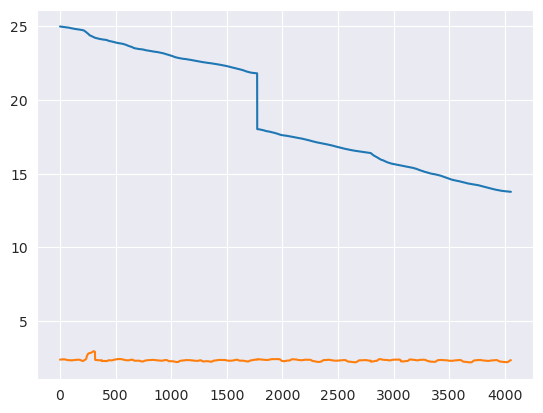

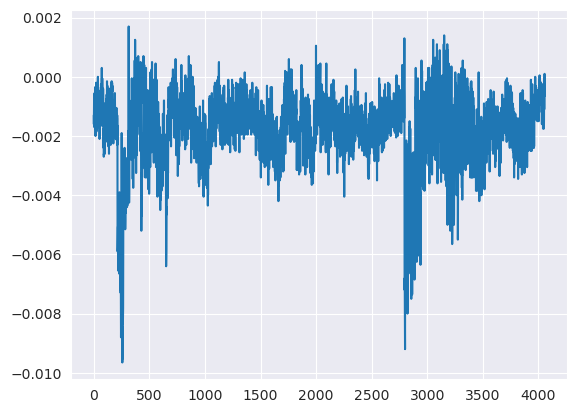

In [15]:
continuous_data_segments[0]["total_vol"].plot()
(continuous_data_segments[0]["total_load"]/100).plot()
plt.figure()
continuous_data_segments[0]["total_vol_diff"].plot()

In [16]:
bool_data_segments = []
original_segments = []
continuous_data_segments = []


for segment in segments:
    # Create a numerical index for grouping
    numeric_data = segment.select_dtypes(include=['number']).copy()
    mask = segments[0].columns.str.startswith("dI")
    bool_columns = segments[0].columns[mask]
    bool_data = segment.loc[:, bool_columns]
    numeric_data.loc[:numeric_data.shape[0]-2, "total_vol_diff"] = numeric_data["total_vol"].diff().values[1:]
    numeric_data.loc[numeric_data["total_vol_diff"]>0, "total_vol_diff"] = 0

    rolling_mean = numeric_data.rolling(100).mean()
    rolling_mean.dropna(inplace=True)
    rolling_mean.loc[rolling_mean["total_vol_diff"]>0, "total_vol_diff"] = 0

    # Find monotonically decreasing segment
    tmp = rolling_mean.copy()
    mono_dec_new_segment = pd.DataFrame(columns=tmp.columns)
    min_value = tmp.loc[tmp.index[0], "total_vol"]
    for idx, row in tmp.iterrows():
        if row["total_vol"] < min_value:
            mono_dec_new_segment.loc[idx] = row
            min_value = row["total_vol"]

    bool_data = bool_data.loc[mono_dec_new_segment.index, :]
    bool_data.dropna(inplace=True)
    bool_data = bool_data.astype(int)
    bool_data["total_vol_diff"] = mono_dec_new_segment["total_vol_diff"]
    mono_dec_new_segment = mono_dec_new_segment.loc[bool_data.index, :]
    bool_data.reset_index(drop=True, inplace=True)
    mono_dec_new_segment.reset_index(drop=True, inplace=True)
    bool_data_segments.append(bool_data)
    continuous_data_segments.append(mono_dec_new_segment)

<AxesSubplot: >

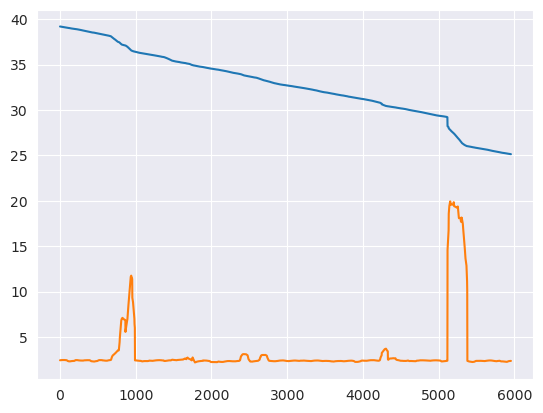

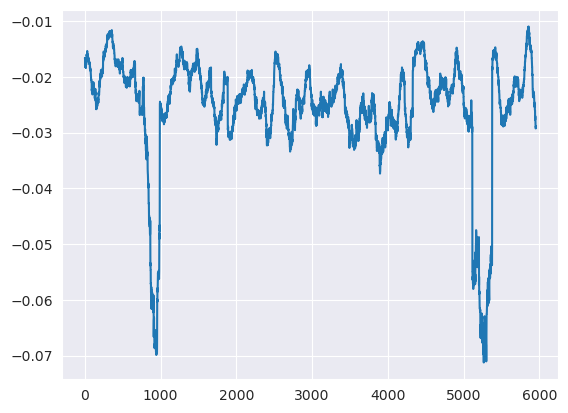

In [17]:
continuous_data_segments[1]["total_vol"].plot()
(continuous_data_segments[1]["total_load"]/100).plot()
plt.figure()
continuous_data_segments[1]["total_vol_diff"].plot()

In [18]:
# Remove bool data that is all false or all true
count_nonzero_list = []
valid_bool_data_list = []
for bool_data in bool_data_segments:
    count_nonzero = pd.DataFrame(data = np.zeros((2, len(bool_data_segments[0].columns))), index=['zero', 'nonzero'], columns=bool_data_segments[0].columns)
    n_rows = len(bool_data)
    for i in bool_data.columns:
        try:
            n_zero = bool_data[i].value_counts()[0]
            n_nonzero = n_rows - n_zero
            count_nonzero[i].iloc[0] = n_zero
            count_nonzero[i].iloc[1] = n_nonzero
        except Exception as e:
            print(f"Didnt work for column {i}")
            print(bool_data[i].value_counts())
    mask = (count_nonzero.loc["nonzero"]!=0) & (count_nonzero.loc["zero"]!=0)
    nonzero_columns = count_nonzero.loc["nonzero"][mask].index
    valid_bool_data_list.append(bool_data[nonzero_columns])

Didnt work for column dIFuelModeActive02Event_x
1    4057
Name: dIFuelModeActive02Event_x, dtype: int64
Didnt work for column dIFuelModeSelected02Event_x
1    4057
Name: dIFuelModeSelected02Event_x, dtype: int64
Didnt work for column dIFuelTransferState00Event_x
1    4057
Name: dIFuelTransferState00Event_x, dtype: int64
Didnt work for column dIGasLeakCheckResult02Event_x
1    4057
Name: dIGasLeakCheckResult02Event_x, dtype: int64
Didnt work for column dIGasValve1CLOSEDPositionFeedbackEvent_x
1    4057
Name: dIGasValve1CLOSEDPositionFeedbackEvent_x, dtype: int64
Didnt work for column dIGasValve2CLOSEDPositionFeedbackEvent_x
1    4057
Name: dIGasValve2CLOSEDPositionFeedbackEvent_x, dtype: int64
Didnt work for column dIGasValveStopSequence00Event_x
1    4057
Name: dIGasValveStopSequence00Event_x, dtype: int64
Didnt work for column dIGasVentValve1CLOSEDPositionFeedbackEvent_x
1    4057
Name: dIGasVentValve1CLOSEDPositionFeedbackEvent_x, dtype: int64
Didnt work for column dIGasVentValve2OPE

<AxesSubplot: >

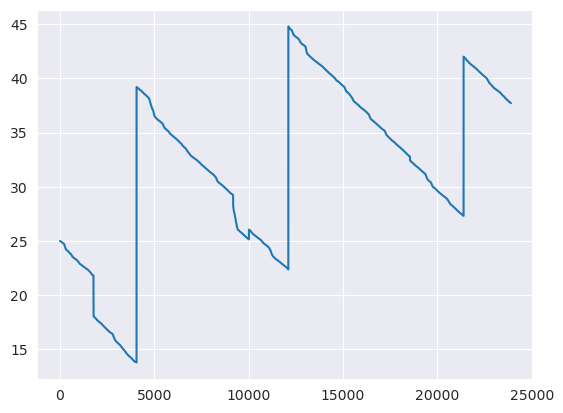

In [19]:
continuous_df = pd.concat(continuous_data_segments)
continuous_df.reset_index(drop=True, inplace=True)
continuous_df["total_vol"].plot()

In [20]:
continuous_df

,Unnamed: 0_x,aIAirTemperatureTCInlet_x,aIBaseDurationGasAdmission_x,aIChargeAirPressureEngineInlet_x,aIChargeAirSetpointBarMPa_x,aIChargeAirTemperatureEngineInlet_x,aICounterStarts_x,aICounterStartsX10000_x,aICrankcasePressure_x,aICyclicSlowTurningResult_x,...,aITimingOffsetPilotInjectionCylinderA06_y,aITimingOffsetPilotInjectionCylinderA07_y,aITimingOffsetPilotInjectionCylinderA08_y,aITimingOffsetPilotInjectionCylinderA09_y,aIWasteGateValvePositionCommand_y,dateTime_y,battery_only_y,total_load,total_vol,total_vol_diff
0,17664.5,30.909,0.0,1.4233,1.8882,43.045,762.0,0.0,1.124,0.0,...,0.0,0.0,0.0,0.0,100.0,1.685643e+12,0.0,238.82,24.98555,-0.01630
1,17665.5,30.909,0.0,1.4244,1.8894,43.043,762.0,0.0,1.125,0.0,...,0.0,0.0,0.0,0.0,100.0,1.685643e+12,0.0,239.62,24.98425,-0.01660
2,17666.5,30.908,0.0,1.4255,1.8905,43.042,762.0,0.0,1.126,0.0,...,0.0,0.0,0.0,0.0,100.0,1.685643e+12,0.0,240.37,24.98265,-0.01660
3,17667.5,30.906,0.0,1.4254,1.8901,43.041,762.0,0.0,1.125,0.0,...,0.0,0.0,0.0,0.0,100.0,1.685643e+12,0.0,240.13,24.98150,-0.01660
4,17668.5,30.907,0.0,1.4251,1.8898,43.039,762.0,0.0,1.125,0.0,...,0.0,0.0,0.0,0.0,100.0,1.685643e+12,0.0,239.95,24.98085,-0.01740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23893,7201.5,37.886,0.0,1.4831,1.9497,42.965,801.0,0.0,0.041,0.0,...,0.0,0.0,0.0,0.0,100.0,1.691015e+12,0.0,280.32,37.71860,-0.02195
23894,7202.5,37.893,0.0,1.4845,1.9509,42.966,801.0,0.0,0.043,0.0,...,0.0,0.0,0.0,0.0,100.0,1.691015e+12,0.0,281.11,37.71765,-0.02230
23895,7203.5,37.899,0.0,1.4859,1.9519,42.966,801.0,0.0,0.045,0.0,...,0.0,0.0,0.0,0.0,100.0,1.691015e+12,0.0,281.81,37.71590,-0.02165
23896,7204.5,37.904,0.0,1.4871,1.9528,42.969,801.0,0.0,0.045,0.0,...,0.0,0.0,0.0,0.0,100.0,1.691015e+12,0.0,282.40,37.71480,-0.02165


In [21]:
for column in continuous_df.columns:
    print(column)

Unnamed: 0_x
aIAirTemperatureTCInlet_x
aIBaseDurationGasAdmission_x
aIChargeAirPressureEngineInlet_x
aIChargeAirSetpointBarMPa_x
aIChargeAirTemperatureEngineInlet_x
aICounterStarts_x
aICounterStartsX10000_x
aICrankcasePressure_x
aICyclicSlowTurningResult_x
aICyclicSlowTurningState_x
aIDVTControlAirPressure_x
aIDurationOffsetGasAdmissionCylinderA01_x
aIDurationOffsetGasAdmissionCylinderA02_x
aIDurationOffsetGasAdmissionCylinderA03_x
aIDurationOffsetGasAdmissionCylinderA04_x
aIDurationOffsetGasAdmissionCylinderA05_x
aIDurationOffsetGasAdmissionCylinderA06_x
aIDurationOffsetGasAdmissionCylinderA07_x
aIDurationOffsetGasAdmissionCylinderA08_x
aIDurationOffsetGasAdmissionCylinderA09_x
aIDurationOffsetPilotInjectionCylinderA01_x
aIDurationOffsetPilotInjectionCylinderA02_x
aIDurationOffsetPilotInjectionCylinderA03_x
aIDurationOffsetPilotInjectionCylinderA04_x
aIDurationOffsetPilotInjectionCylinderA05_x
aIDurationOffsetPilotInjectionCylinderA06_x
aIDurationOffsetPilotInjectionCylinderA07_x
aIDu

<AxesSubplot: >

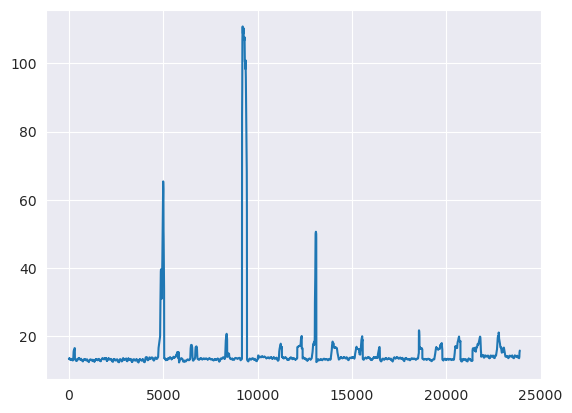

In [28]:
(continuous_df.aIEngineLoadPercent_x+continuous_df.aIEngineLoadPercent_y).plot()

<AxesSubplot: >

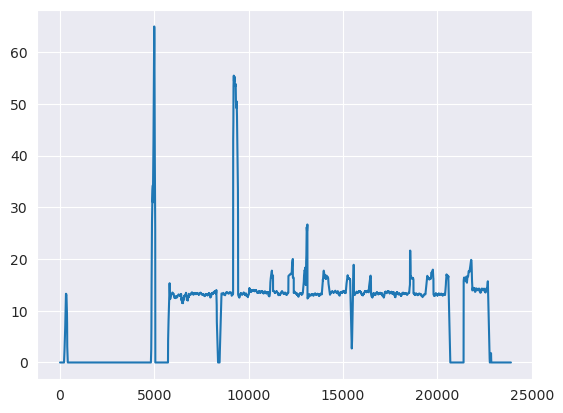

In [27]:
continuous_df.aIEngineLoadPercent_y.plot()

# Feature importance of numeric values

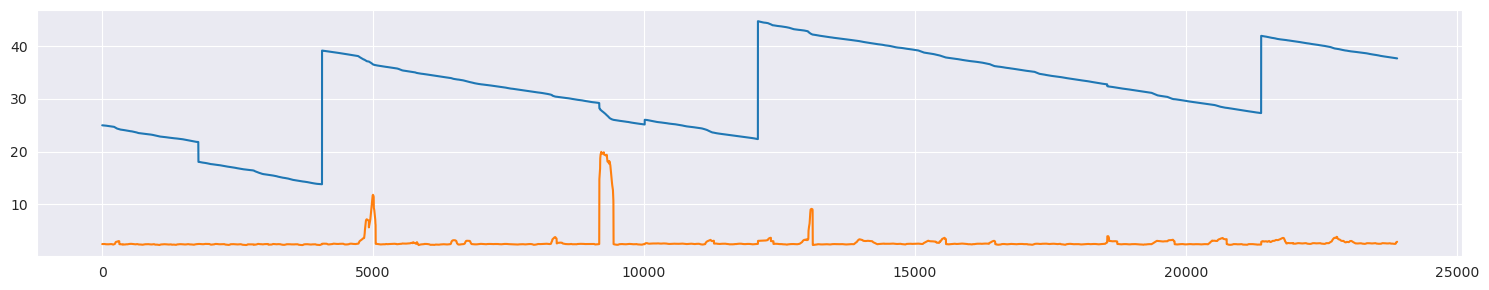

In [94]:
# Creating a 2x3 grid plot
plt.figure(figsize=(15, 3))

# Plotting in the first five subplots
plt.plot(continuous_df["total_vol"])
plt.plot(continuous_df["total_load"]/100)

plt.tight_layout()
plt.show()

# .plot()
# (rolling_mean_segments[1]["total_load"]/100).plot()

## Numeric values by correlation

In [95]:
corrs_df = continuous_df.corr()[["total_vol_diff"]]

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [97]:
# Drop all zero columns
nonzero_columns = continuous_df.loc[:, (continuous_df!=0).any(axis=0)].copy()
nonzero_columns.drop("total_vol_diff", inplace=True, axis=1)
continuous_columns = nonzero_columns.columns
scaler = StandardScaler()
X = scaler.fit_transform(nonzero_columns)
y = continuous_df["total_vol_diff"]

## Lasso regression

In [98]:
alpha = [0.2, 0.25, 0.275, 0.3, 0.325, 0.35]

lasso_feature_coef_df = pd.DataFrame(np.zeros((len(continuous_columns), len(alpha))), index=continuous_columns, columns=alpha)
for a in alpha:
    lasso = Lasso(alpha=a)
    lasso.fit(X, y)
    
    lasso_feature_coef_df[a] = lasso.coef_

In [99]:
lasso_top10_features = lasso_feature_coef_df.reindex(index=lasso_feature_coef_df[0.30].abs().sort_values(ascending = False).index).head(10)

lasso_top10_features

,0.200,0.250,0.275,0.300,0.325,0.350
Unnamed: 0_x,0.0,0.0,0.0,0.0,0.0,0.0
aIExhaustGasTemperatureTCOutlet_y,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
aIFuelActuatorDemand_y,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
aIFuelModeActive_y,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
aIFuelModeApplied_y,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
aIFuelModeSelected_y,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
aIFuelTransferState_y,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
aIGRUControlAirPressure_y,0.0,0.0,0.0,0.0,0.0,0.0
aIGRUEnclosurePressure_y,0.0,0.0,0.0,0.0,0.0,0.0
aIGasFlow_y,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [100]:
selected_features_lasso = lasso_top10_features.index[:4].tolist()
print('Features of significant coefficient include: \n', selected_features_lasso)

Features of significant coefficient include: 
 ['Unnamed: 0_x', 'aIExhaustGasTemperatureTCOutlet_y', 'aIFuelActuatorDemand_y', 'aIFuelModeActive_y']


## RFR

In [101]:
rf = RandomForestRegressor(n_estimators=200, criterion='squared_error', max_features='sqrt')
rf.fit(X, y)

RandomForestRegressor(max_features='sqrt', n_estimators=200)

In [102]:
# Store the top 30 most important features based off rf regressor
rf_feature_importance_df = pd.DataFrame(rf.feature_importances_, index=continuous_columns, columns=['Importance_Value'])
rf_top30_features = rf_feature_importance_df.sort_values(by = ['Importance_Value'], ascending=False).head(30)

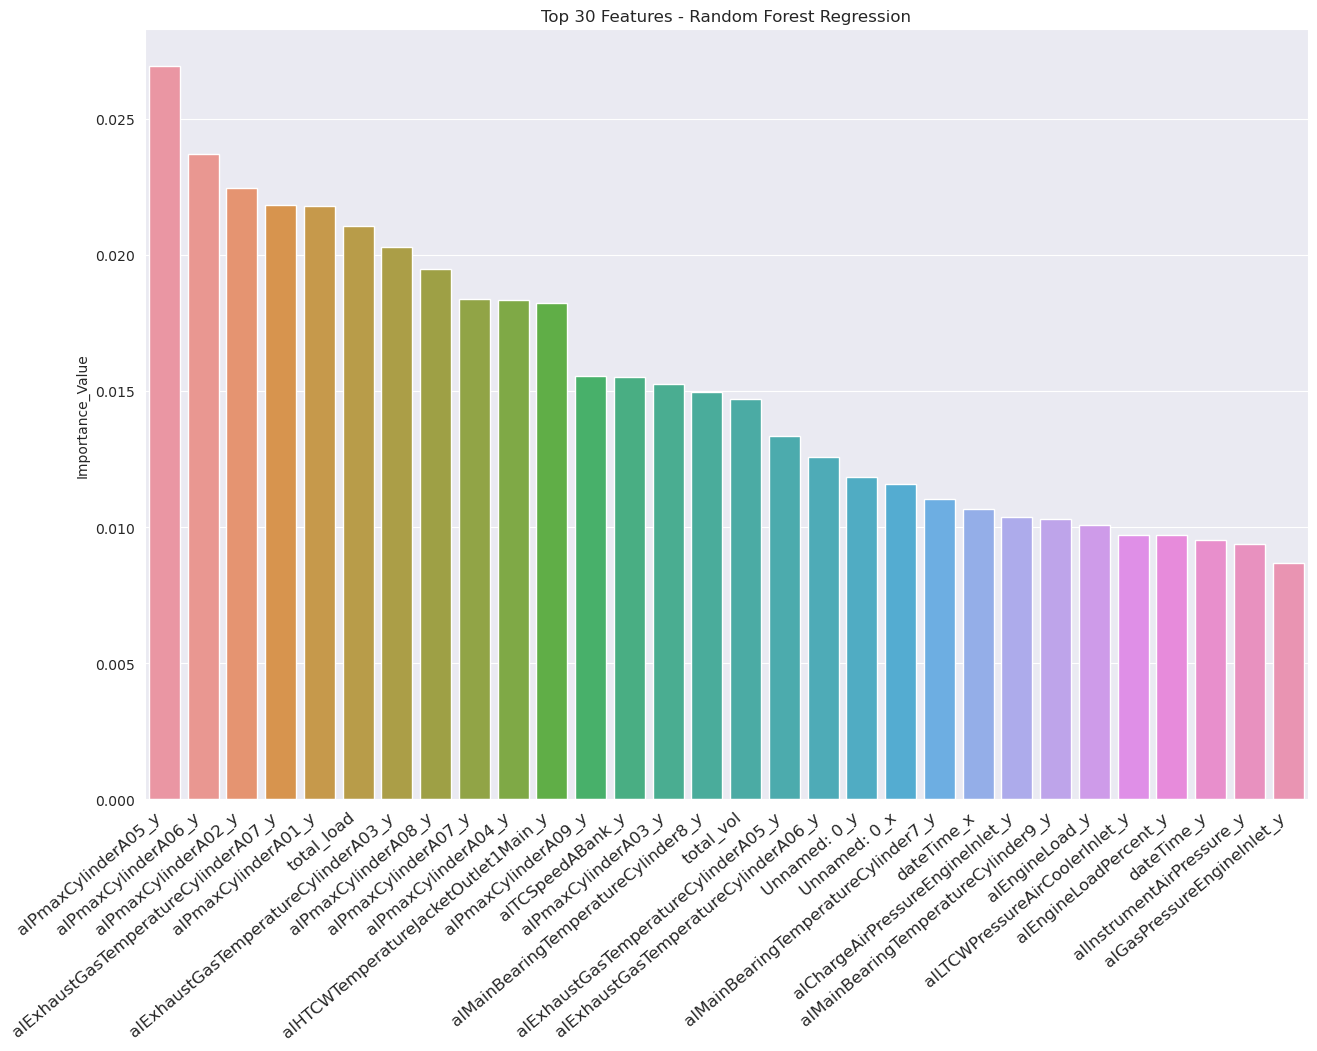

In [103]:
plt.figure(figsize=(15, 10))
ax0 = sns.barplot(x = rf_top30_features.index, y = 'Importance_Value', data=rf_top30_features)
ax0.set_xticklabels(ax0.get_xticklabels(), fontsize = 12, rotation=40, ha="right")
plt.title('Top 30 Features - Random Forest Regression')
plt.show()

In [104]:
selected_features_rf = rf_top30_features[rf_top30_features.Importance_Value >= 0.005].index.tolist()

print('Features of high importance value include: \n', selected_features_rf)

Features of high importance value include: 
 ['aIPmaxCylinderA05_y', 'aIPmaxCylinderA06_y', 'aIPmaxCylinderA02_y', 'aIExhaustGasTemperatureCylinderA07_y', 'aIPmaxCylinderA01_y', 'total_load', 'aIExhaustGasTemperatureCylinderA03_y', 'aIPmaxCylinderA08_y', 'aIPmaxCylinderA07_y', 'aIPmaxCylinderA04_y', 'aIHTCWTemperatureJacketOutlet1Main_y', 'aIPmaxCylinderA09_y', 'aITCSpeedABank_y', 'aIPmaxCylinderA03_y', 'aIMainBearingTemperatureCylinder8_y', 'total_vol', 'aIExhaustGasTemperatureCylinderA05_y', 'aIExhaustGasTemperatureCylinderA06_y', 'Unnamed: 0_y', 'Unnamed: 0_x', 'aIMainBearingTemperatureCylinder7_y', 'dateTime_x', 'aIChargeAirPressureEngineInlet_y', 'aIMainBearingTemperatureCylinder9_y', 'aIEngineLoad_y', 'aILTCWPressureAirCoolerInlet_y', 'aIEngineLoadPercent_y', 'dateTime_y', 'aIInstrumentAirPressure_y', 'aIGasPressureEngineInlet_y']


## Gradient tree boosting regression

In [105]:
gbr = GradientBoostingRegressor(loss='squared_error', n_estimators=200, learning_rate=0.1, 
                                max_depth=8, max_features = 'sqrt',  
                                min_samples_split = 500, random_state=0)
gbr.fit(X, y)

GradientBoostingRegressor(max_depth=8, max_features='sqrt',
                          min_samples_split=500, n_estimators=200,
                          random_state=0)

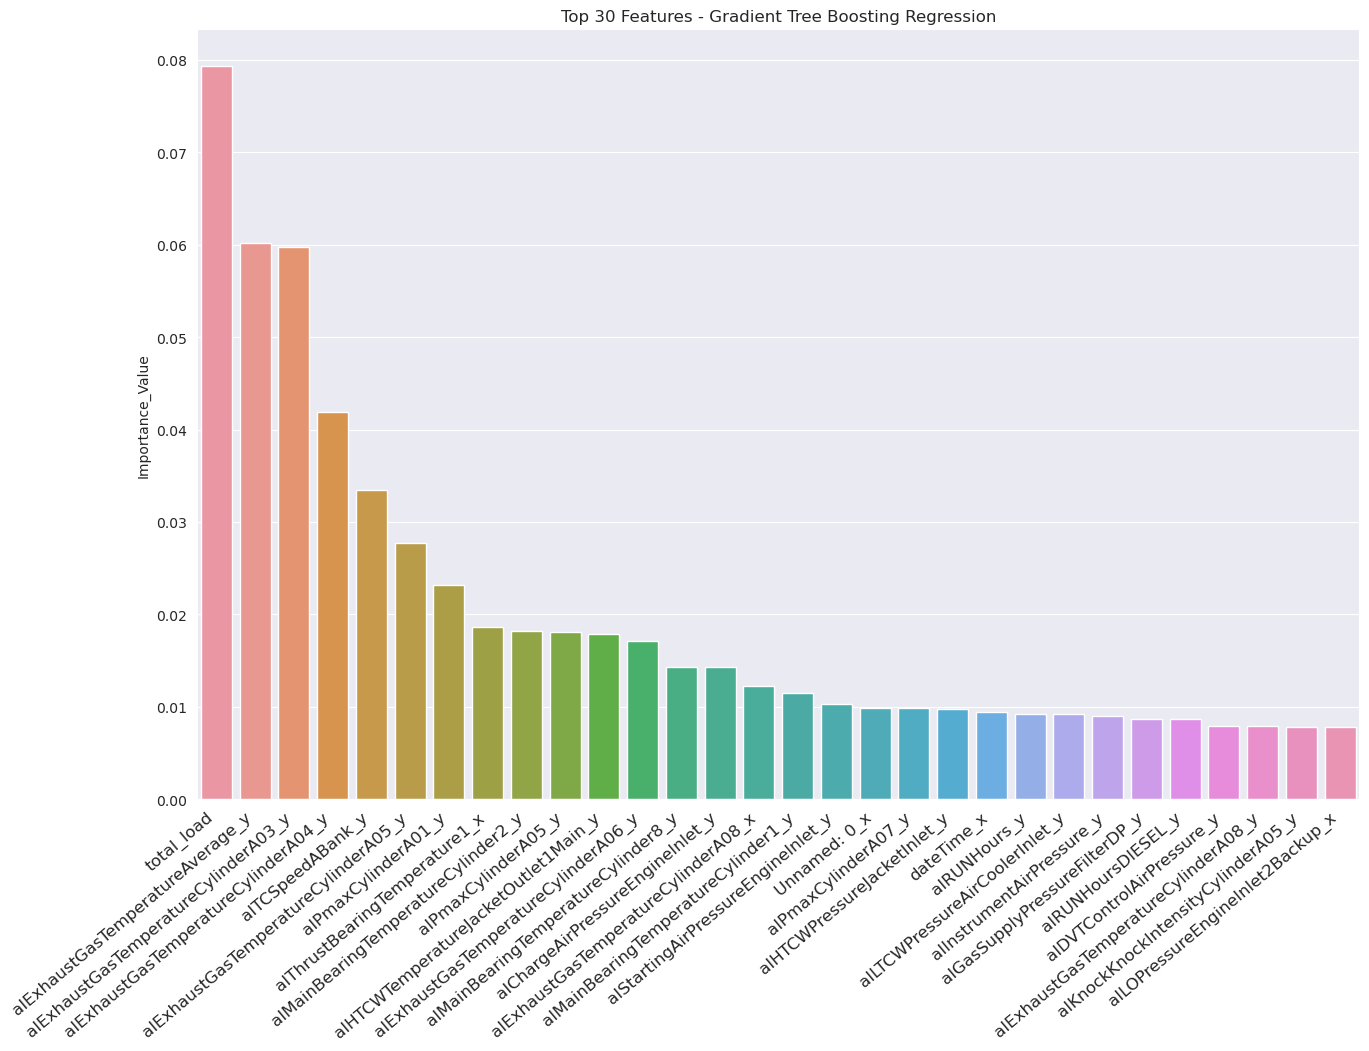

In [106]:
plt.figure(figsize=(15, 10))
gbr_feature_importance_df = pd.DataFrame(gbr.feature_importances_, index=continuous_columns, columns=['Importance_Value'])
gbr_top30_features = gbr_feature_importance_df.sort_values(by = ['Importance_Value'], ascending=False).head(30)

ax1 = sns.barplot(x = gbr_top30_features.index, y = 'Importance_Value', data=gbr_top30_features)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize = 12, rotation=40, ha="right")
plt.title('Top 30 Features - Gradient Tree Boosting Regression')
plt.show()

In [107]:
selected_features_gbr = gbr_top30_features[gbr_top30_features.Importance_Value >= 0.005].index.tolist()

print('Features of high importance value include: \n', selected_features_gbr)

Features of high importance value include: 
 ['total_load', 'aIExhaustGasTemperatureAverage_y', 'aIExhaustGasTemperatureCylinderA03_y', 'aIExhaustGasTemperatureCylinderA04_y', 'aITCSpeedABank_y', 'aIExhaustGasTemperatureCylinderA05_y', 'aIPmaxCylinderA01_y', 'aIThrustBearingTemperature1_x', 'aIMainBearingTemperatureCylinder2_y', 'aIPmaxCylinderA05_y', 'aIHTCWTemperatureJacketOutlet1Main_y', 'aIExhaustGasTemperatureCylinderA06_y', 'aIMainBearingTemperatureCylinder8_y', 'aIChargeAirPressureEngineInlet_y', 'aIExhaustGasTemperatureCylinderA08_x', 'aIMainBearingTemperatureCylinder1_y', 'aIStartingAirPressureEngineInlet_y', 'Unnamed: 0_x', 'aIPmaxCylinderA07_y', 'aIHTCWPressureJacketInlet_y', 'dateTime_x', 'aIRUNHours_y', 'aILTCWPressureAirCoolerInlet_y', 'aIInstrumentAirPressure_y', 'aIGasSupplyPressureFilterDP_y', 'aIRUNHoursDIESEL_y', 'aIDVTControlAirPressure_y', 'aIExhaustGasTemperatureCylinderA08_y', 'aIKnockKnockIntensityCylinderA05_y', 'aILOPressureEngineInlet2Backup_x']


In [108]:
selected_features_combined = set(selected_features_rf+selected_features_gbr)

print('Selected features among combined variables include: \n', selected_features_combined)

Selected features among combined variables include: 
 {'aIPmaxCylinderA05_y', 'aIPmaxCylinderA04_y', 'aIRUNHours_y', 'aIChargeAirPressureEngineInlet_y', 'aIMainBearingTemperatureCylinder9_y', 'aIThrustBearingTemperature1_x', 'aIGasSupplyPressureFilterDP_y', 'aIPmaxCylinderA03_y', 'aIMainBearingTemperatureCylinder1_y', 'aILTCWPressureAirCoolerInlet_y', 'aITCSpeedABank_y', 'aIPmaxCylinderA02_y', 'aIRUNHoursDIESEL_y', 'aIExhaustGasTemperatureCylinderA08_y', 'aIMainBearingTemperatureCylinder7_y', 'aIPmaxCylinderA09_y', 'aIExhaustGasTemperatureCylinderA05_y', 'aIStartingAirPressureEngineInlet_y', 'Unnamed: 0_y', 'aIHTCWTemperatureJacketOutlet1Main_y', 'Unnamed: 0_x', 'aIMainBearingTemperatureCylinder8_y', 'aIGasPressureEngineInlet_y', 'aIHTCWPressureJacketInlet_y', 'aIMainBearingTemperatureCylinder2_y', 'aIDVTControlAirPressure_y', 'aIExhaustGasTemperatureCylinderA07_y', 'aIExhaustGasTemperatureCylinderA03_y', 'aIKnockKnockIntensityCylinderA05_y', 'total_vol', 'aIPmaxCylinderA01_y', 'aIExha

## Combine RFR and GTBR

In [109]:
rf = RandomForestRegressor(n_estimators=200, criterion='squared_error', max_features='sqrt')
rf.fit(X, y)
# Store the top 30 most important features based off rf regressor
rf_feature_importance_df = pd.DataFrame(rf.feature_importances_, index=continuous_columns, columns=['Importance_Value'])
rf_top30_features = rf_feature_importance_df.sort_values(by = ['Importance_Value'], ascending=False).head(30)
selected_features_rf = rf_top30_features[rf_top30_features.Importance_Value >= 0.005].index.tolist()

gbr = GradientBoostingRegressor(loss='squared_error', n_estimators=200, learning_rate=0.1, 
                                max_depth=8, max_features = 'sqrt',  
                                min_samples_split = 500, random_state=0)
gbr.fit(X, y)
gbr_feature_importance_df = pd.DataFrame(gbr.feature_importances_, index=continuous_columns, columns=['Importance_Value'])
gbr_top30_features = gbr_feature_importance_df.sort_values(by = ['Importance_Value'], ascending=False).head(30)
selected_features_gbr = gbr_top30_features[gbr_top30_features.Importance_Value >= 0.005].index.tolist()
selected_features_combined = list(set(selected_features_rf+selected_features_gbr))

# Predicting the fuel consumption

## Using only continuous values

In [110]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.svm import SVR


# Define the Neural Network
class Net(nn.Module):
    def __init__(self, num_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_features, 64)  # Increased number of neurons
        self.bn1 = nn.BatchNorm1d(64)           # Batch normalization
        self.dropout1 = nn.Dropout(0.2)         # Dropout
        self.fc3 = nn.Linear(64, 1)             # 2 inputs, 1 output

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = self.fc3(x)
        return x

def net_pipeline(X_train, y_train, X_test, y_test, epochs):
    net = Net(X_train.shape[1])

    # Define the Loss Function and Optimizer
    criterion = nn.MSELoss()
    # optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.01)
    # optimizer = optim.Adadelta(net.parameters()) # 0.02
    # optimizer = optim.Adagrad(net.parameters()) # 0.0018
    # optimizer = optim.AdamW(net.parameters()) # 0.0008
    # optimizer = optim.SparseAdam(net.parameters()) # Doesnt work
    # optimizer = optim.Adamax(net.parameters()) #0.002
    # optimizer = optim.ASGD(net.parameters()) # 0.00077
    # optimizer = optim.NAdam(net.parameters()) # 0.00078
    # optimizer = optim.RAdam(net.parameters()) #  0.00077
    # optimizer = optim.RMSprop(net.parameters()) # 0.0049
    optimizer = optim.Rprop(net.parameters()) # 0.00072
    # optimizer = optim.SGD(net.parameters(), lr=0.01) # 0.00077

    # Example Data (you will replace this with your actual data)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # Convert X to a PyTorch tensor
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # Convert y to a PyTorch tensor
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)  # Convert X to a PyTorch tensor
    inputs = X_train_tensor
    targets = y_train_tensor

    # Training the Network
    for epoch in range(epochs):  # number of times to loop over the dataset
        optimizer.zero_grad()   # zero the parameter gradients
        outputs = net(inputs)   # forward pass
        loss = criterion(outputs, targets) # calculate the loss
        loss.backward()         # backward pass
        optimizer.step()        # optimize

        if epoch % 10 == 0:    # print every 100 epochs
            print(f'Epoch {epoch}, Loss: {loss.item()}')

    with torch.no_grad():
        test_input = X_test_tensor # Example voltage input
        predicted = net(test_input)
        mae = mean_absolute_error(y_test, predicted)
        mape = mean_absolute_percentage_error(y_test, predicted)
    return mae, mape

# net_pipeline(X_train_, y_train_.values.reshape(-1,1), X_test_, y_test_.values.reshape(-1,1), epochs=20000)

In [111]:
from itertools import product
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_percentage_error

In [204]:
# We will use only the monotonically decreasing segments cuz increasing fuel values don't make sense
models_list = ["lr", "lasso", "ridge", "bayesian_ridge", "elasticnet", "DT", "RF", "xgb", "lgbm", "gpr", "knr", "svr", "kernel_ridge", "lars", "lassolars", "NN"]
feat_sel_methods = ["corr", "rfr", "gbr", "combined"]
topk = 15
parameters = list(product(models_list, feat_sel_methods))
results_df = pd.DataFrame(index=models_list) # For mae
results_list = [] # (model_name, mae, preds)
mape_df = pd.DataFrame(index=models_list) # For mae

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for model_name, feat_sel_method in parameters:
    if (feat_sel_method=="corr"):
        corr = corrs_df
        selected_negative_features = list(corr.sort_values(by="total_vol_diff")[:topk].index)
        selected_positive_features = list(corr.sort_values(by="total_vol_diff", ascending=False)[:topk].index)
        selected_features_continuous = list(set(selected_negative_features+selected_positive_features))
    elif feat_sel_method=="rfr":
        selected_features_continuous = selected_features_rf
    elif feat_sel_method=="gbr":
        selected_features_continuous = selected_features_gbr
    elif feat_sel_method=="combined":
        selected_features_continuous = selected_features_combined
    if "total_vol_diff" in selected_features_continuous:
        selected_features_continuous.remove("total_vol_diff")

    try:
        print(f"Trying model {model_name}")

        X = nonzero_columns[selected_features_continuous].copy()
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        # y = segment["total_vol_diff"].values.reshape(-1, 1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        if model_name != "NN":
            if model_name == "lr":
                model = LinearRegression()
            elif model_name == "lasso":
                model = Lasso()
            elif model_name == "ridge":
                model = Ridge()
            elif model == "bayesian_ridge":
                model = BayesianRidge()
            elif model_name == "elastic":
                model = ElasticNet()
            elif model_name == "DT":
                model = DecisionTreeRegressor()
            elif model_name == "RF":
                model = RandomForestRegressor()
            elif model_name == "xgb":
                model = XGBRegressor()
            elif model_name == "lgbm":
                model = LGBMRegressor()
            elif model_name == "gpr":
                model = GaussianProcessRegressor()
            elif model_name == "knr":
                model = KNeighborsRegressor()
            elif model_name == "svr":
                model = SVR()
            elif model_name == "kernel_ridge":
                model = KernelRidge()
            elif model_name == "lars":
                model = Lars()
            elif model_name == "lasso_lars":
                model = LassoLars()
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            mae = mean_absolute_error(pred, y_test)
            mape = mean_absolute_percentage_error(pred, y_test)
            results_df.loc[model_name, feat_sel_method] = mae
            mape_df.loc[model_name, feat_sel_method] = mape
            results_list.append((model_name, mae, mape, pred))
        elif model_name == "NN":
            mae, mape = net_pipeline(X_train, y_train.values.reshape(-1,1), X_test, y_test.values.reshape(-1,1), epochs=200)
            results_df.loc[model_name, feat_sel_method] = mae
            mape_df.loc[model_name, feat_sel_method] = mape
    except Exception as e:
        print(e)
        continue

Trying model lr
Trying model lr
Trying model lr
Trying model lr
Trying model lasso
Trying model lasso
Trying model lasso
Trying model lasso
Trying model ridge
Trying model ridge
Trying model ridge
Trying model ridge
Trying model bayesian_ridge
Trying model bayesian_ridge
Trying model bayesian_ridge
Trying model bayesian_ridge
Trying model elasticnet
Trying model elasticnet
Trying model elasticnet
Trying model elasticnet
Trying model DT
Trying model DT
Trying model DT
Trying model DT
Trying model RF
Trying model RF
Trying model RF
Trying model RF
Trying model xgb
Trying model xgb
Trying model xgb
Trying model xgb
Trying model lgbm
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3865
[LightGBM] [Info] Number of data points in the train set: 19118, number of used features: 29
[LightGBM] [Info] Start training from score -0.023643
Trying model lgbm
[

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff0202be200>
Traceback (most recent call last):
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <func

Trying model knr
Trying model knr
Trying model knr
Trying model knr
Trying model svr
Trying model svr
Trying model svr
Trying model svr
Trying model kernel_ridge
Trying model kernel_ridge
Trying model kernel_ridge
Trying model kernel_ridge
Trying model lars
Trying model lars
Trying model lars
Trying model lars
Trying model lassolars
Trying model lassolars
Trying model lassolars
Trying model lassolars
Trying model NN
Epoch 0, Loss: 0.13121528923511505


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.685e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=1.306e-04, with an active set of 9 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 53 iterations, i.e. alpha=2.803e-04

Epoch 10, Loss: 0.026833755895495415
Epoch 20, Loss: 0.012550133280456066
Epoch 30, Loss: 0.003760347608476877
Epoch 40, Loss: 0.001092293648980558
Epoch 50, Loss: 0.0003528599045239389
Epoch 60, Loss: 0.00015094701666384935
Epoch 70, Loss: 0.00010632853809511289
Epoch 80, Loss: 7.048004044918343e-05
Epoch 90, Loss: 4.512038140092045e-05
Epoch 100, Loss: 3.5953060432802886e-05
Epoch 110, Loss: 3.269083390478045e-05
Epoch 120, Loss: 3.110287434537895e-05
Epoch 130, Loss: 2.9885706680943258e-05
Epoch 140, Loss: 2.8794216632377356e-05
Epoch 150, Loss: 2.8274334908928722e-05
Epoch 160, Loss: 2.7554091502679512e-05
Epoch 170, Loss: 2.7384478016756475e-05
Epoch 180, Loss: 2.69108477368718e-05
Epoch 190, Loss: 2.654866511875298e-05
Trying model NN
Epoch 0, Loss: 0.4280388057231903
Epoch 10, Loss: 0.03431699052453041
Epoch 20, Loss: 0.018964026123285294
Epoch 30, Loss: 0.006681136321276426
Epoch 40, Loss: 0.0027697014156728983
Epoch 50, Loss: 0.001290527288801968
Epoch 60, Loss: 0.000762458192

In [205]:
results_df

,corr,rfr,gbr,combined
lr,0.003979,0.004195,0.004123,0.004004
lasso,0.005408,0.005408,0.005408,0.005408
ridge,0.003996,0.004221,0.004162,0.004093
bayesian_ridge,0.003996,0.004221,0.004162,0.004093
elasticnet,0.003996,0.004221,0.004162,0.004093
DT,0.000382,0.000456,0.000457,0.000453
RF,0.000355,0.000386,0.000373,0.000374
xgb,0.000687,0.000654,0.000602,0.000597
lgbm,0.001165,0.001055,0.000936,0.000894
gpr,0.001198,0.000560,0.000638,0.000647


In [206]:
selected_features_continuous = list(set(selected_negative_features+selected_positive_features))
if "total_vol_diff" in selected_features_continuous:
    selected_features_continuous.remove("total_vol_diff")
X = nonzero_columns[selected_features_continuous].copy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
# y = segment["total_vol_diff"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
preds_rf = random_forest.predict(X_test)
mae_rf = mean_absolute_error(preds_rf, y_test)
mape_rf = mean_absolute_percentage_error(preds_rf, y_test)
print(mae_rf, mape_rf)

0.00035388514644351516 0.015244022869202012


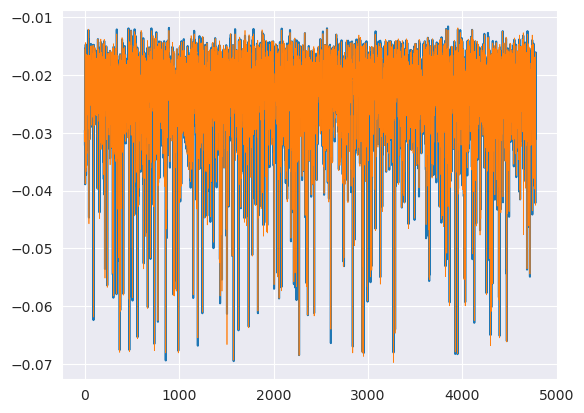

In [207]:
plt.plot(preds_rf)
plt.plot(y_test.reset_index(drop=True), linewidth=0.5)

In [208]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
preds_knn = knn.predict(X_test)
mae = mean_absolute_error(preds_knn, y_test)
mape = mean_absolute_percentage_error(preds_knn, y_test)
print(mae, mape)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fefa81e0dc0>
Traceback (most recent call last):
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


0.0004181820083682014 0.017891191119258923


### Hyperparameter tuning for KNR

In [152]:
selected_features_continuous = list(set(selected_negative_features+selected_positive_features))
if "total_vol_diff" in selected_features_continuous:
    selected_features_continuous.remove("total_vol_diff")
X = nonzero_columns[selected_features_continuous].copy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
# y = segment["total_vol_diff"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

# Initialize the KNN model
knn = KNeighborsRegressor()

# Initialize Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff02108edd0>
Traceback (most recent call last):
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <func

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fef54cc1870>
Traceback (most recent call last):
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


0.0003523901857102939


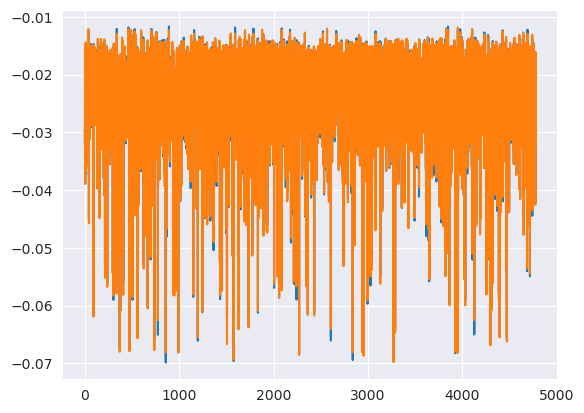

In [154]:
best_model = KNeighborsRegressor(**best_params)
best_model.fit(X_train, y_train)
best_preds = best_model.predict(X_test)
mae = mean_absolute_error(best_preds, y_test)
print(mae)
plt.plot(best_preds)
plt.plot(y_test.reset_index(drop=True))

In [171]:
# Tune the weights parameter
def inverse_distance(distances):
    return 1 / (distances + 1e-5)

def exponential_decay(distances):
    return np.exp(-distances)

def gaussian_weight(distances, sigma=0.5):
    return np.exp(-np.power(distances, 2.) / (2 * np.power(sigma, 2.)))

def linear_decay(distances):
    return 1 - distances / np.max(distances)

def inverse_squared_distance(distances):
    return 1 / (np.square(distances) + 1e-5)

def uniform_weight(distances):
    return np.ones_like(distances)

def threshold_weight(distances, threshold=1.0):
    return np.where(distances < threshold, 1, 0)

def rank_weight(distances):
    sorted_indices = np.argsort(distances, axis=1)
    ranks = np.argsort(sorted_indices, axis=1)
    return 1 / (ranks + 1)

def linear_proportional(distances):
    return distances / np.max(distances)

def squared_distance(distances):
    return np.square(distances)

def squared_distance(distances):
    return np.square(distances)

def logarithmic(distances):
    return np.log(distances + 1e-5)

def sqrt_distance(distances):
    return np.sqrt(distances)

def exponential_proportional(distances):
    return np.exp(distances - np.min(distances))

def custom_scaled_distance(distances, scale=1.0):
    return distances * scale


from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define models with custom weight functions
models = {
    'inverse_distance': KNeighborsRegressor(weights=inverse_distance),
    'exponential_decay': KNeighborsRegressor(weights=exponential_decay),
    'gaussian_weight': KNeighborsRegressor(weights=gaussian_weight),
    'linear_decay': KNeighborsRegressor(weights=linear_decay),
    'inverse_squared_distance': KNeighborsRegressor(weights=inverse_squared_distance),
    'uniform_weight': KNeighborsRegressor(weights=uniform_weight),
    'threshold_weight': KNeighborsRegressor(weights=threshold_weight),
    'rank_weight': KNeighborsRegressor(weights=rank_weight),
    'linear_proportional': KNeighborsRegressor(weights=linear_proportional),
    'squared_distance': KNeighborsRegressor(weights=squared_distance),
    'squared_distance': KNeighborsRegressor(weights=squared_distance),
    'logarithmic': KNeighborsRegressor(weights=logarithmic),
    'sqrt_distance': KNeighborsRegressor(weights=sqrt_distance),
    'exponential_proportional': KNeighborsRegressor(weights=exponential_proportional),
    'custom_scaled_distance': KNeighborsRegressor(weights=custom_scaled_distance)
    # Add other models with custom functions here
}

param_grid = {
    'n_neighbors': [3],
}
results = {}
# Perform grid search for each model
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train, y_train)
    results[name] = (grid_search.best_score_, grid_search.best_params_)
    print(f"{name}: Best Parameters: {grid_search.best_params_}, Best Score: {grid_search.best_score_}")


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff0210d2e60>
Traceback (most recent call last):
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <func

inverse_distance: Best Parameters: {'n_neighbors': 3}, Best Score: -0.00039432312554802133
exponential_decay: Best Parameters: {'n_neighbors': 3}, Best Score: -0.00041686828988539155


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff020e68b80>
Traceback (most recent call last):
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <func

gaussian_weight: Best Parameters: {'n_neighbors': 3}, Best Score: -0.00041748106209722426
linear_decay: Best Parameters: {'n_neighbors': 3}, Best Score: -0.00041776632705904334


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff0210d2cb0>
Traceback (most recent call last):
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <func

inverse_squared_distance: Best Parameters: {'n_neighbors': 3}, Best Score: -0.0003958944766620031
uniform_weight: Best Parameters: {'n_neighbors': 3}, Best Score: -0.00041812540312415774


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:255: RuntimeWarning: invalid value encountered in divide
  y_pred[:, j] = num / denom
/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/

threshold_weight: Best Parameters: {'n_neighbors': 3}, Best Score: nan
rank_weight: Best Parameters: {'n_neighbors': 3}, Best Score: -0.0003939714762836133


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff0210d25f0>
Traceback (most recent call last):
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <func

linear_proportional: Best Parameters: {'n_neighbors': 3}, Best Score: -0.0004569562440085766
squared_distance: Best Parameters: {'n_neighbors': 3}, Best Score: -0.00049125857115263


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff0210d2f80>
Traceback (most recent call last):
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <func

logarithmic: Best Parameters: {'n_neighbors': 3}, Best Score: -0.00041448379718247216
sqrt_distance: Best Parameters: {'n_neighbors': 3}, Best Score: -0.0004372944599815189


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff0210d2f80>
Traceback (most recent call last):
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <func

exponential_proportional: Best Parameters: {'n_neighbors': 3}, Best Score: -0.000420253815471648
custom_scaled_distance: Best Parameters: {'n_neighbors': 3}, Best Score: -0.0004569562440085766


In [172]:
# Sort the dictionary by values (scores)
sorted_scores = sorted(results.items(), key=lambda x: (x[1] is float('nan'), x[1]))

sorted_scores_dict = {k: v for k, v in sorted_scores}
sorted_scores_dict

{'squared_distance': (-0.00049125857115263, {'n_neighbors': 3}),
 'linear_proportional': (-0.0004569562440085766, {'n_neighbors': 3}),
 'custom_scaled_distance': (-0.0004569562440085766, {'n_neighbors': 3}),
 'sqrt_distance': (-0.0004372944599815189, {'n_neighbors': 3}),
 'exponential_proportional': (-0.000420253815471648, {'n_neighbors': 3}),
 'uniform_weight': (-0.00041812540312415774, {'n_neighbors': 3}),
 'linear_decay': (-0.00041776632705904334, {'n_neighbors': 3}),
 'gaussian_weight': (-0.00041748106209722426, {'n_neighbors': 3}),
 'exponential_decay': (-0.00041686828988539155, {'n_neighbors': 3}),
 'inverse_squared_distance': (-0.0003958944766620031, {'n_neighbors': 3}),
 'inverse_distance': (-0.00039432312554802133, {'n_neighbors': 3}),
 'threshold_weight': (nan, {'n_neighbors': 3}),
 'logarithmic': (-0.00041448379718247216, {'n_neighbors': 3}),
 'rank_weight': (-0.0003939714762836133, {'n_neighbors': 3})}

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff0207d1870>
Traceback (most recent call last):
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


0.0003519015486956926


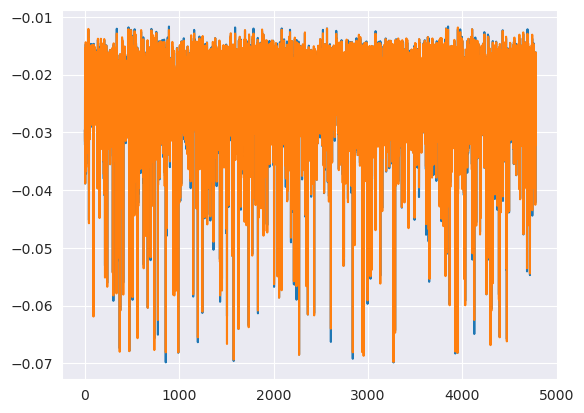

In [185]:
best_knr = KNeighborsRegressor(metric='manhattan', n_neighbors=3, weights=inverse_squared_distance)
best_knr.fit(X_train, y_train)
best_preds_knr = best_knr.predict(X_test)
mae = mean_absolute_error(best_preds_knr, y_test)
print(mae)
plt.plot(best_preds_knr)
plt.plot(y_test.reset_index(drop=True))

### Hyperparameter tuning for RFR

In [335]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest model
rf = RandomForestRegressor()

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0`

[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=13.6min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=13.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=13.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=13.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=13.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=13.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=14.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=14.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=14.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=14.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=14.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=14.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=27.1min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=27.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=13.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=27.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=13.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=13.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=27.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=28.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=28.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=28.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=28.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=28.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=29.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=29.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=13.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=13.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=40.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=27.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=41.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=13.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=27.1min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=12.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=27.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=41.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=13.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=12.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=42.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=28.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=42.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=43.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=43.1min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=43.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=44.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=12.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=12.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=13.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=26.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=27.0min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=41.2min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=27.8min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=41.8min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=41.1min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=12.9min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=12.9min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=42.5min
[CV] END max_depth=N

/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 3.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 5.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 5.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 5.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 1.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 1.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 3.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 3.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 3.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 5.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 5.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 5.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 3.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 3.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 5.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 3.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 5.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 5.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 5.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 5.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 5.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=25.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=38.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=38.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 5.9min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=38.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=40.1min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=38.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=40.1min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=11.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=11.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=11.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=11.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=11.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=11.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=11.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=11.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=11.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=17.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=38.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=17.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=17.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=11.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=11.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=11.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=38.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=40.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=17.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=17.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=17.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=17.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=17.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=17.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=11.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=11.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=11.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=17.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=17.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time= 5.9min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time= 5.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time= 5.9min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=17.6min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  54.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  54.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  54.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=11.8min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=11.8min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=11.7min
[CV] END max_depth=10, max_features=s

/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 1.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 2.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=11.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  53.7s


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  53.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 2.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  53.8s


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 2.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 1.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 1.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 2.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=17.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 1.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=17.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 2.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 2.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 1.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 1.8min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 1.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 2.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 2.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 2.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 2.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 2.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 2.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=17.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=17.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=17.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=17.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=17.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=17.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=10.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=10.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=10.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=10.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=10.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=10.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=10.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=10.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=10.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=10.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=10.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=10.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=20.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=20.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=21.1min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=10.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=10.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=20.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=20.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=20.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=10.1min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=20.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=20.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=20.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=20.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=20.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=20.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=10.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=10.1min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=10.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=31.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=31.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=31.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=30.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=20.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=20.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=31.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=10.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=10.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=31.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=30.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=30.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=30.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=20.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=10.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=30.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=31.1min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=30.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=20.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=20.4min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=20.5min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=10.1min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=10.2min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=10.0min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=10.1min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=10.0min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.6min
[CV] END max_depth=20, max_features=

/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 4.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=20.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 4.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 1.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 1.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 1.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 2.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 3.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 3.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 4.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 4.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 4.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 2.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 3.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 3.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 4.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 4.5min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 4.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=20.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=30.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 4.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 4.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 4.4min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=30.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=30.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=30.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=30.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=30.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=13.1min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=13.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=13.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=13.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=30.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=30.1min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=30.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=13.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=12.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=12.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=12.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=12.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=12.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=12.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=12.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=26.1min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=26.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=12.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=26.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=12.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=12.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=25.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=25.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=26.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=25.1min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=25.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=25.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=25.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=26.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=25.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=12.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=12.5min
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=12.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=39.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=39.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=38.3min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=40.1min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=38.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=25.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=12.2min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=12.5min
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=37.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=25.9min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=39.7min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=38.8min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=37.6min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=25.4min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=12.1min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=38.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=38.1min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=12.5min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=25.0min


/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=25.4min
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=12.1min
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=12.2min
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=25.1min
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=39.1min
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=12.5min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.9min
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=12.0min
[CV] END max_depth=30, max_features=

In [336]:
best_params

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

0.00034544592929987804


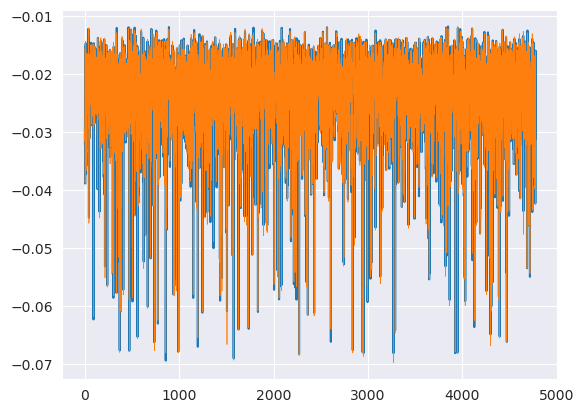

In [186]:
best_params = {'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}
best_rfr = RandomForestRegressor(**best_params)
best_rfr.fit(X_train, y_train)
best_preds_rfr = best_rfr.predict(X_test)
mae_rfr = mean_absolute_error(best_preds_rfr, y_test)
print(mae_rfr)
plt.plot(best_preds_rfr)
plt.plot(y_test.reset_index(drop=True), linewidth=0.5)

### Ensemble

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff0208eb9a0>
Traceback (most recent call last):
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


0.0003519015486956926


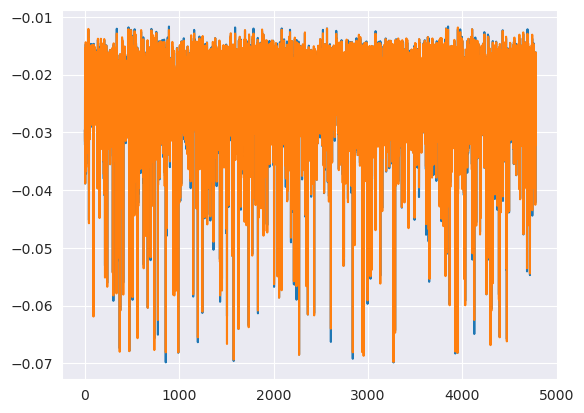

In [187]:
best_knr = KNeighborsRegressor(metric='manhattan', n_neighbors=3, weights=inverse_squared_distance)
best_knr.fit(X_train, y_train)
best_preds_knr = best_knr.predict(X_test)
mae = mean_absolute_error(best_preds_knr, y_test)
print(mae)
plt.plot(best_preds_knr)
plt.plot(y_test.reset_index(drop=True))

0.00034440033145783733


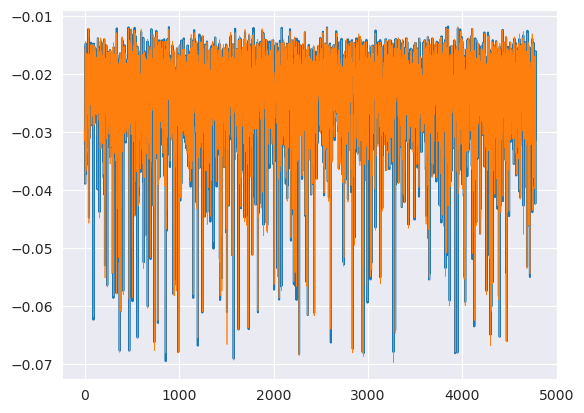

In [188]:
best_params = {'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}
best_rfr = RandomForestRegressor(**best_params)
best_rfr.fit(X_train, y_train)
best_preds_rfr = best_rfr.predict(X_test)
mae_rfr = mean_absolute_error(best_preds_rfr, y_test)
print(mae_rfr)
plt.plot(best_preds_rfr)
plt.plot(y_test.reset_index(drop=True), linewidth=0.5)

0.0003407109897585304


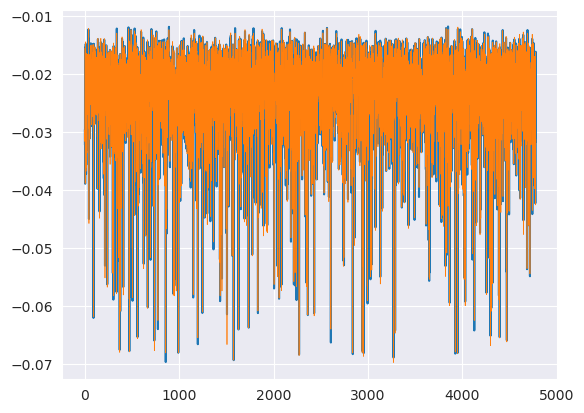

In [198]:
ens_preds = best_preds_rfr*0.5 + best_preds_knr*0.5
ens_mae = mean_absolute_error(ens_preds, y_test)
print(ens_mae)
plt.plot(ens_preds)
plt.plot(y_test.reset_index(drop=True), linewidth=0.5)

0.0003580359308430414


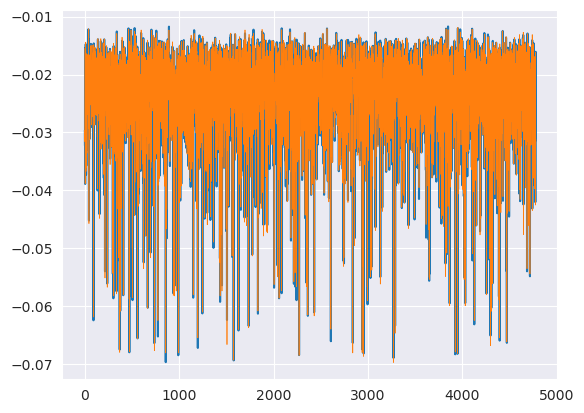

## Using only categorical features

In [168]:
categorical_df = pd.concat(valid_bool_data_list, join="outer")
categorical_df.reset_index(drop=True, inplace=True)
original_categorical_df = categorical_df.copy()
categorical_df.shape

(23898, 122)

In [169]:
categorical_df = categorical_df.loc[:, categorical_df.isna().sum()<3000]
categorical_df.dropna(inplace=True)
categorical_df.shape

(21809, 14)

In [170]:
X_data = categorical_df.drop("total_vol_diff", axis=1)
y_data = categorical_df["total_vol_diff"]

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [171]:
random_forest = RandomForestRegressor(n_estimators=1000)
random_forest.fit(X_train_cat, y_train_cat.values.reshape(-1,1))
preds = random_forest.predict(X_test_cat)
mean_absolute_error(preds, y_test_cat)

/tmp/ipykernel_3019034/4000575674.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train_cat, y_train_cat.values.reshape(-1,1))


0.0008345782889695823

In [199]:
knn = KNeighborsRegressor(n_neighbors=51)
knn.fit(X_train_cat, y_train_cat)
preds_knn = knn.predict(X_test_cat)
mae = mean_absolute_error(preds_knn, y_test_cat)
mape = mean_absolute_percentage_error(preds_knn, y_test_cat)
print(mae, mape)

0.0008521907112225911 0.44266816689523647


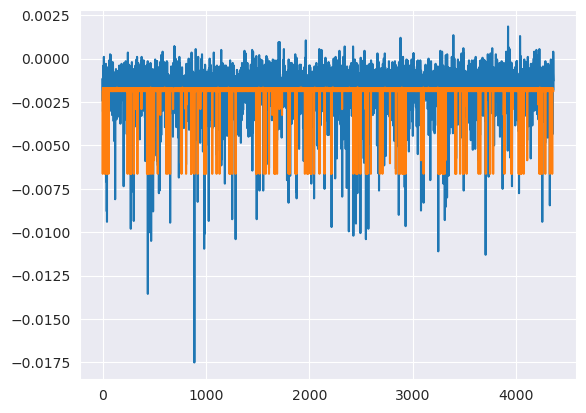

In [200]:
plt.plot(y_test_cat.reset_index(drop=True))
plt.plot(preds_knn)

## Using all features

In [270]:
categorical_df = pd.concat(valid_bool_data_list, join="outer")
categorical_df.reset_index(drop=True, inplace=True)
original_categorical_df = categorical_df.copy()
categorical_df = original_categorical_df.loc[:, original_categorical_df.isna().sum()<3000].copy()
categorical_df.shape

(23898, 14)

In [271]:
nan_indexes = categorical_df[categorical_df.isna().any(axis=1)].index
categorical_df.dropna(inplace=True)
y = categorical_df["total_vol_diff"].copy()
categorical_df.drop("total_vol_diff", axis=1, inplace=True)

In [202]:
# all_features_df = pd.concat([continuous_df, categorical_df], axis=1)
# all_features_df = all_features_df.loc[:, all_features_df.isna().sum()<3000]
# all_features_df.dropna(inplace=True)
# all_features_df.shape

(21809, 323)

In [272]:
# We will use only the monotonically decreasing segments cuz increasing fuel values don't make sense
models_list = ["lr", "lasso", "ridge", "bayesian_ridge", "elasticnet", "DT", "RF", "xgb", "lgbm", "gpr", "knr", "svr", "kernel_ridge", "lars", "lassolars", "NN"]
feat_sel_methods = ["corr", "rfr", "gbr", "combined"]
topk = 15
parameters = list(product(models_list, feat_sel_methods))
results_df = pd.DataFrame(index=models_list) # For mae
results_list = [] # (model_name, mae, preds)
mape_df = pd.DataFrame(index=models_list) # For mae

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for model_name, feat_sel_method in parameters:
    if (feat_sel_method=="corr"):
        corr = corrs_df
        selected_negative_features = list(corr.sort_values(by="total_vol_diff")[:topk].index)
        selected_positive_features = list(corr.sort_values(by="total_vol_diff", ascending=False)[:topk].index)
        selected_features_continuous = list(set(selected_negative_features+selected_positive_features))
    elif feat_sel_method=="rfr":
        selected_features_continuous = selected_features_rf
    elif feat_sel_method=="gbr":
        selected_features_continuous = selected_features_gbr
    elif feat_sel_method=="combined":
        selected_features_continuous = selected_features_combined
    if "total_vol_diff" in selected_features_continuous:
        selected_features_continuous.remove("total_vol_diff")

    try:
        print(f"Trying model {model_name}")
        X = nonzero_columns[selected_features_continuous].copy()
        X.drop(nan_indexes, inplace=True)
        X.reset_index(drop=True, inplace=True)
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        X = np.hstack((X, categorical_df))
        # y = segment["total_vol_diff"].values.reshape(-1, 1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        if model_name != "NN":
            if model_name == "lr":
                model = LinearRegression()
            elif model_name == "lasso":
                model = Lasso()
            elif model_name == "ridge":
                model = Ridge()
            elif model == "bayesian_ridge":
                model = BayesianRidge()
            elif model_name == "elastic":
                model = ElasticNet()
            elif model_name == "DT":
                model = DecisionTreeRegressor()
            elif model_name == "RF":
                model = RandomForestRegressor()
            elif model_name == "xgb":
                model = XGBRegressor()
            elif model_name == "lgbm":
                model = LGBMRegressor()
            elif model_name == "gpr":
                model = GaussianProcessRegressor()
            elif model_name == "knr":
                model = KNeighborsRegressor()
            elif model_name == "svr":
                model = SVR()
            elif model_name == "kernel_ridge":
                model = KernelRidge()
            elif model_name == "lars":
                model = Lars()
            elif model_name == "lasso_lars":
                model = LassoLars()
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            mae = mean_absolute_error(pred, y_test)
            mape = mean_absolute_percentage_error(pred, y_test)
            results_df.loc[model_name, feat_sel_method] = mae
            mape_df.loc[model_name, feat_sel_method] = mape
            results_list.append((model_name, mae, mape, pred))
        elif model_name == "NN":
            mae, mape = net_pipeline(X_train, y_train.values.reshape(-1,1), X_test, y_test.values.reshape(-1,1), epochs=200)
            results_df.loc[model_name, feat_sel_method] = mae
            mape_df.loc[model_name, feat_sel_method] = mape
    except Exception as e:
        print(e)
        continue

Trying model lr
Trying model lr
Trying model lr
Trying model lr
Trying model lasso
Trying model lasso
Trying model lasso
Trying model lasso
Trying model ridge
Trying model ridge
Trying model ridge
Trying model ridge
Trying model bayesian_ridge
Trying model bayesian_ridge
Trying model bayesian_ridge
Trying model bayesian_ridge
Trying model elasticnet
Trying model elasticnet
Trying model elasticnet
Trying model elasticnet
Trying model DT
Trying model DT
Trying model DT
Trying model DT
Trying model RF
Trying model RF
Trying model RF
Trying model RF
Trying model xgb
Trying model xgb
Trying model xgb
Trying model xgb
Trying model lgbm
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2864
[LightGBM] [Info] Number of data points in the train set: 17447, number of used features: 42
[LightGBM

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f42da29e680>
Traceback (most recent call last):
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hanyang/miniconda3/envs/wpcn_env/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <func

Trying model knr
Trying model knr
Trying model knr
Trying model knr
Trying model svr
Trying model svr
Trying model svr
Trying model svr
Trying model kernel_ridge
Trying model kernel_ridge
Trying model kernel_ridge
Trying model kernel_ridge
Trying model lars
Trying model lars
Trying model lars
Trying model lars
Trying model lassolars
Trying model lassolars
Trying model lassolars
Trying model lassolars
Trying model NN
Epoch 0, Loss: 0.30716148018836975
Epoch 10, Loss: 0.030772192403674126
Epoch 20, Loss: 0.011905324645340443
Epoch 30, Loss: 0.0028213413897901773
Epoch 40, Loss: 0.0009003938757814467
Epoch 50, Loss: 0.00029297033324837685
Epoch 60, Loss: 0.00012848235201090574
Epoch 70, Loss: 6.72197638778016e-05
Epoch 80, Loss: 3.0114684705040418e-05
Epoch 90, Loss: 2.020837928284891e-05
Epoch 100, Loss: 1.2814506590075325e-05
Epoch 110, Loss: 9.659379429649562e-06
Epoch 120, Loss: 7.432168331433786e-06
Epoch 130, Loss: 5.827876066177851e-06
Epoch 140, Loss: 4.573450041789329e-06
Epoch 1

In [303]:
results_df.drop(["lars", "lassolars"])

,corr,rfr,gbr,combined
lr,0.000773,0.000780,0.000781,0.000774
lasso,0.000907,0.000907,0.000907,0.000907
ridge,0.000773,0.000777,0.000778,0.000771
bayesian_ridge,0.000773,0.000777,0.000778,0.000771
elasticnet,0.000773,0.000777,0.000778,0.000771
DT,0.000725,0.000728,0.000733,0.000727
RF,0.000565,0.000558,0.000555,0.000555
xgb,0.000625,0.000608,0.000603,0.000601
lgbm,0.000619,0.000610,0.000610,0.000605
gpr,0.001323,0.001043,0.001018,0.000970


In [307]:
continuous_df[selected_features_gbr]

,total_load,aIExhaustGasTemperatureAverage_y,aIExhaustGasTemperatureCylinderA03_y,aIExhaustGasTemperatureCylinderA04_y,aIFuelActuatorDemand_y,aIExhaustGasTemperatureCylinderA05_y,aIPmaxCylinderA08_y,aIFuelModeApplied_y,aIExhaustGasTemperatureCylinderA04_x,aIMainBearingTemperatureCylinder2_y,...,aIKnockKnockIntensityCylinderA07_y,aIThrustBearingTemperature1_x,aIRUNHours_y,aITCSpeedABank_x,aIMainBearingTemperatureCylinder9_x,aIMainBearingTemperatureCylinder7_x,aIExhaustGasTemperatureTCOutlet_y,aIExhaustGasTemperatureCylinderA01_y,aICrankcasePressure_y,aIHTCWTemperatureJacketInlet_x
0,238.82,55.70,55.54,55.95,0.0,54.48,0.0,2.0,296.86,40.955,...,0.0,74.951,2398.0,19188.3,72.567,73.624,32.98,57.00,0.519,81.674
1,239.62,55.69,55.53,55.94,0.0,54.47,0.0,2.0,297.04,40.956,...,0.0,74.953,2398.0,19206.0,72.569,73.628,32.96,57.00,0.518,81.671
2,240.37,55.69,55.52,55.94,0.0,54.47,0.0,2.0,297.24,40.960,...,0.0,74.956,2398.0,19223.7,72.573,73.632,32.96,57.00,0.518,81.667
3,240.13,55.68,55.51,55.94,0.0,54.46,0.0,2.0,297.24,40.959,...,0.0,74.957,2398.0,19222.2,72.576,73.635,32.95,57.00,0.518,81.663
4,239.95,55.67,55.50,55.94,0.0,54.46,0.0,2.0,297.07,40.956,...,0.0,74.957,2398.0,19218.9,72.577,73.637,32.95,56.99,0.517,81.663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23893,280.32,56.98,57.17,57.22,0.0,55.56,0.0,1.0,304.50,45.053,...,0.0,75.264,3087.0,20232.0,72.707,73.956,42.73,58.45,-0.471,81.282
23894,281.11,56.99,57.16,57.22,0.0,55.57,0.0,1.0,304.54,45.049,...,0.0,75.266,3087.0,20252.7,72.713,73.959,42.72,58.45,-0.471,81.275
23895,281.81,56.99,57.16,57.22,0.0,55.58,0.0,1.0,304.65,45.046,...,0.0,75.269,3087.0,20272.5,72.716,73.966,42.72,58.46,-0.472,81.273
23896,282.40,56.99,57.16,57.22,0.0,55.58,0.0,1.0,304.74,45.045,...,0.0,75.271,3087.0,20289.6,72.720,73.973,42.70,58.45,-0.472,81.272


In [285]:
# Define the Neural Network
class Net(nn.Module):
    def __init__(self, num_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_features, 64)  # Increased number of neurons
        self.bn1 = nn.BatchNorm1d(64)           # Batch normalization
        self.dropout1 = nn.Dropout(0.2)         # Dropout
        self.fc3 = nn.Linear(64, 1)             # 2 inputs, 1 output

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = self.fc3(x)
        return x

def net_pipeline(X_train, y_train, X_test, y_test, epochs):
    net = Net(X_train.shape[1])

    # Define the Loss Function and Optimizer
    criterion = nn.MSELoss()
    # optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.01)
    # optimizer = optim.Adadelta(net.parameters()) # 0.02
    # optimizer = optim.Adagrad(net.parameters()) # 0.0018
    # optimizer = optim.AdamW(net.parameters()) # 0.0008
    # optimizer = optim.SparseAdam(net.parameters()) # Doesnt work
    # optimizer = optim.Adamax(net.parameters()) #0.002
    # optimizer = optim.ASGD(net.parameters()) # 0.00077
    # optimizer = optim.NAdam(net.parameters()) # 0.00078
    # optimizer = optim.RAdam(net.parameters()) #  0.00077
    # optimizer = optim.RMSprop(net.parameters()) # 0.0049
    optimizer = optim.Rprop(net.parameters()) # 0.00072
    # optimizer = optim.SGD(net.parameters(), lr=0.01) # 0.00077

    # Example Data (you will replace this with your actual data)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # Convert X to a PyTorch tensor
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # Convert y to a PyTorch tensor
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)  # Convert X to a PyTorch tensor
    inputs = X_train_tensor
    targets = y_train_tensor

    # Training the Network
    for epoch in range(epochs):  # number of times to loop over the dataset
        optimizer.zero_grad()   # zero the parameter gradients
        outputs = net(inputs)   # forward pass
        loss = criterion(outputs, targets) # calculate the loss
        loss.backward()         # backward pass
        optimizer.step()        # optimize

        if epoch % 10 == 0:    # print every 100 epochs
            print(f'Epoch {epoch}, Loss: {loss.item()}')

    with torch.no_grad():
        test_input = X_test_tensor # Example voltage input
        predicted = net(test_input)
        mae = mean_absolute_error(y_test, predicted)
        mape = mean_absolute_percentage_error(y_test, predicted)
    return mae, mape, predicted

In [286]:
mae, mape, predicted = net_pipeline(X_train, y_train.values.reshape(-1,1), X_test, y_test.values.reshape(-1,1), epochs=20000)

Epoch 0, Loss: 0.07003460824489594
Epoch 10, Loss: 0.024539889767766
Epoch 20, Loss: 0.009560832753777504
Epoch 30, Loss: 0.003724179696291685
Epoch 40, Loss: 0.0018073474057018757
Epoch 50, Loss: 0.0008169120992533863
Epoch 60, Loss: 0.0006277203792706132
Epoch 70, Loss: 0.00043629141873680055
Epoch 80, Loss: 0.0002578661369625479
Epoch 90, Loss: 0.00020105834119021893
Epoch 100, Loss: 0.00015656303730793297
Epoch 110, Loss: 0.00012253544991835952
Epoch 120, Loss: 9.633844456402585e-05
Epoch 130, Loss: 7.986187119968235e-05
Epoch 140, Loss: 6.385514279827476e-05
Epoch 150, Loss: 5.605072874459438e-05
Epoch 160, Loss: 4.954466567141935e-05
Epoch 170, Loss: 4.104370964341797e-05
Epoch 180, Loss: 3.0439627153100446e-05
Epoch 190, Loss: 2.4546476197429e-05
Epoch 200, Loss: 2.3242164388648234e-05
Epoch 210, Loss: 2.077857243421022e-05
Epoch 220, Loss: 1.7681833924143575e-05
Epoch 230, Loss: 1.3710860002902336e-05
Epoch 240, Loss: 1.3274075172375888e-05
Epoch 250, Loss: 1.1143707524752244e-

In [289]:
mae, mape

(0.0007980454106152851, 22024023713.894703)

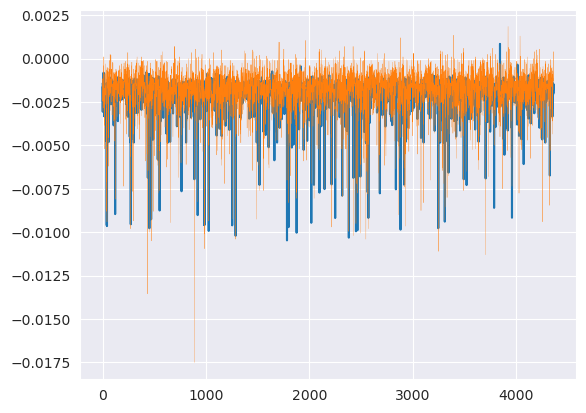

In [297]:
plt.plot(predicted)
plt.plot(y_test.reset_index(drop=True), linewidth=0.2)